**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: ------------------------------( David Uscanga Tiburcio )------------------------------

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from matplotlib.patches import Circle
import numpy as np

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [4]:
# Cargar el archivo
uploaded = files.upload()

# Crear el dataframe "happiness"
happiness = pd.read_csv(next(iter(uploaded)))

# Mostrar los registros
print("Dataframe happiness:")
print(happiness.to_string(index=False), '\n')
print("Shape:", happiness.shape)

Saving happiness_report.csv to happiness_report.csv
Dataframe happiness:
 Overall rank        Country or region  Score  GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption
            1                  Finland  7.769           1.340           1.587                    0.986                         0.596       0.153                      0.393
            2                  Denmark  7.600           1.383           1.573                    0.996                         0.592       0.252                      0.410
            3                   Norway  7.554           1.488           1.582                    1.028                         0.603       0.271                      0.341
            4                  Iceland  7.494           1.380           1.624                    1.026                         0.591       0.354                      0.118
            5              Netherlands  7.488           1.396      

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [5]:
mexico = happiness[happiness['Country or region'] == 'Mexico'].copy()
mexico.set_index('Country or region', inplace=True)

print("Dataframe mexico:")
print(mexico.to_string())


Dataframe mexico:
                   Overall rank  Score  GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption
Country or region                                                                                                                                                   
Mexico                       23  6.595            1.07           1.323                    0.861                         0.433       0.074                      0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

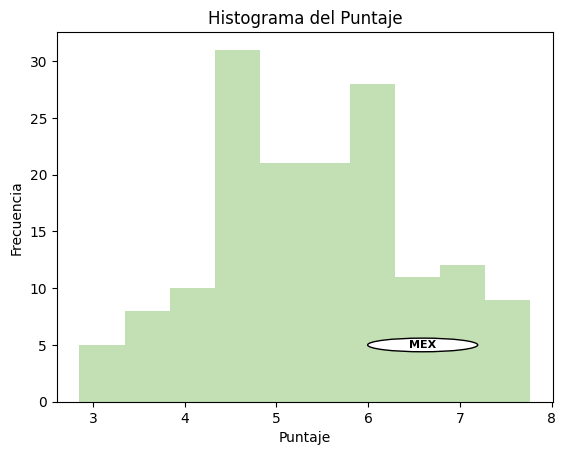

In [6]:
# Obtener el puntaje de México
mexico_score = mexico['Score'].values[0]

# Histograma del puntaje con color verde claro
plt.hist(happiness['Score'], bins=10, color='#C2E0B3')

# Tamaño y estilo de la etiqueta
radio = 0.6
texto = 8

# Agregar etiqueta redonda personalizada para México (No se si se referia a poner el circulo, intente poner este)
circle = Circle((mexico_score, 5), radius=radio, edgecolor='black', facecolor='white')
plt.gca().add_patch(circle)
plt.text(mexico_score, 5, "MEX", ha='center', va='center', color='black', weight='bold', fontsize=texto)

# Configurar los ejes y el título del gráfico
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.title("Histograma del Puntaje")

# Mostrar el histograma
plt.show()





5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

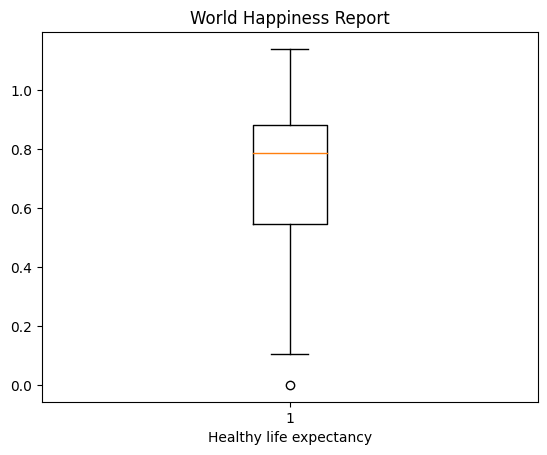

In [7]:
# Crear el box plot de la columna "esperanza de vida"
plt.boxplot(happiness['Healthy life expectancy'])

# Obtener el índice del valor de México
indice = happiness[happiness['Country or region'] == 'Mexico'].index[0]

# Obtener el valor de México
valor_mexico = happiness.loc[indice, 'Healthy life expectancy']

# Configurar los ejes y el título del gráfico
plt.xlabel("Healthy life expectancy")
plt.title("World Happiness Report")

# Mostrar el box plot
plt.show()




6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

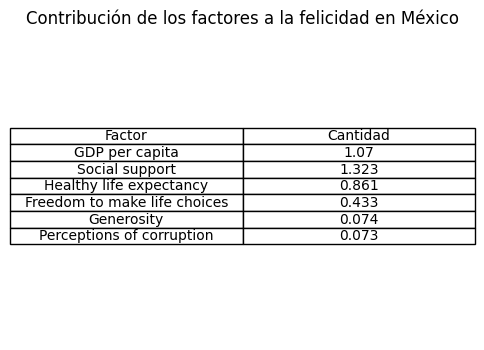

In [59]:
#Nombres de los factores
nombres = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Obtener los valores de los factores para México
valores = mexico[nombres].values.flatten()

# Crear un dataframe para la tabla
tabla_datos = pd.DataFrame({'Factor': nombres, 'Cantidad': valores})

# Configurar la figura y los ejes para la tabla
fig, ax = plt.subplots(figsize=(6, 4))

# Crear la tabla
tabla = ax.table(cellText=tabla_datos.values,
                  colLabels=tabla_datos.columns,
                  cellLoc='center',
                  loc='center')

# Configurar el estilo de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)

# Ocultar los ejes de la tabla
ax.axis('off')

# Configurar el título de la tabla
ax.set_title('Contribución de los factores a la felicidad en México')

# Mostrar la tabla
plt.show()


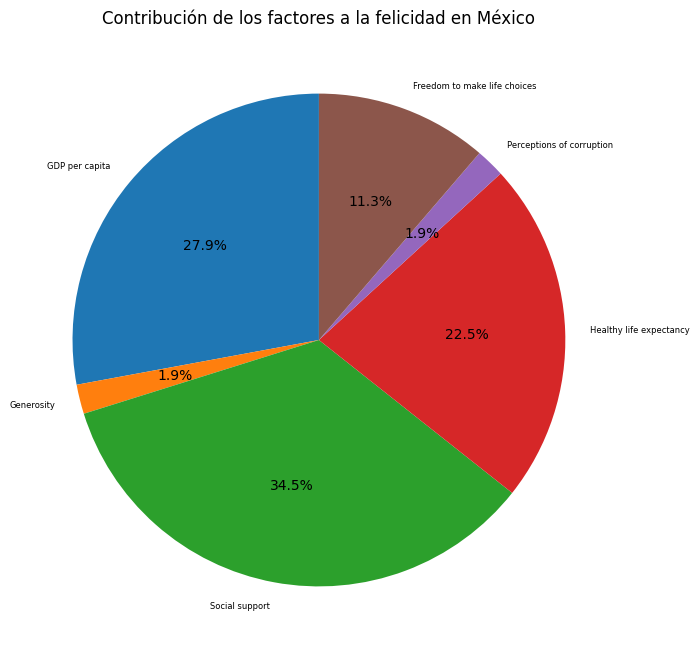

In [9]:
# Obtener los nombres de los factores
nombres = ['GDP per capita', 'Generosity','Social support', 'Healthy life expectancy', 'Perceptions of corruption','Freedom to make life choices']

# Obtener los valores de los factores para México
valores = mexico[nombres].values.flatten()

# Configurar la figura y los ejes para el gráfico circular
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el gráfico circular con los porcentajes
_, text, _ = ax.pie(valores, labels=nombres, startangle=90, autopct='%1.1f%%')

# Configurar el tamaño de fuente de las etiquetas
plt.setp(text, size=6)

# Configurar el título
ax.set_title('Contribución de los factores a la felicidad en México')

# Ajustar el tamaño para evitar superposición de texto
plt.gca().set_aspect('equal')

# Mostrar el gráfico
plt.show()


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

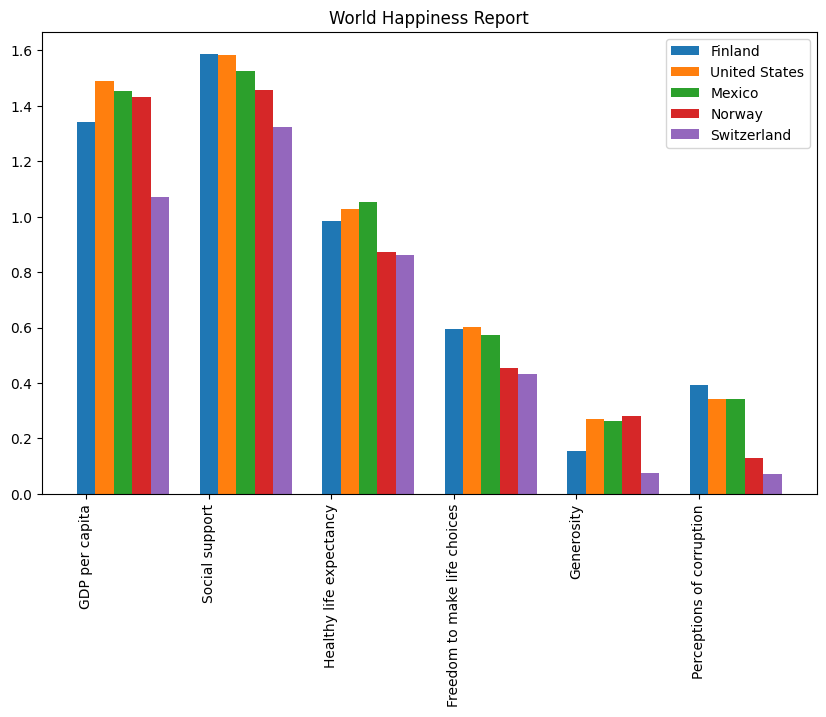

In [10]:
# Filtrar el dataframe para los 5 países
countries = ['Finland', 'United States', 'Mexico', 'Norway', 'Switzerland']
datos = happiness[happiness['Country or region'].isin(countries)]

# Obtener los nombres de los factores
nombres = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Obtener los valores de los factores para los países seleccionados y transponerlos
valores = datos[datos['Country or region'].isin(countries)][nombres].values

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras para los factores
x = np.arange(len(nombres))
ancho = 0.15

for i, country in enumerate(countries):
    ax.bar(x + (i * ancho), valores[i], ancho, label=country)

# Configurar el título y los ejes del gráfico
ax.set_title('World Happiness Report')
ax.set_xticks(x)
ax.set_xticklabels(nombres, rotation='vertical')

# Añadir una leyenda al gráfico
ax.legend()

# Mostrar el gráfico
plt.show()


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

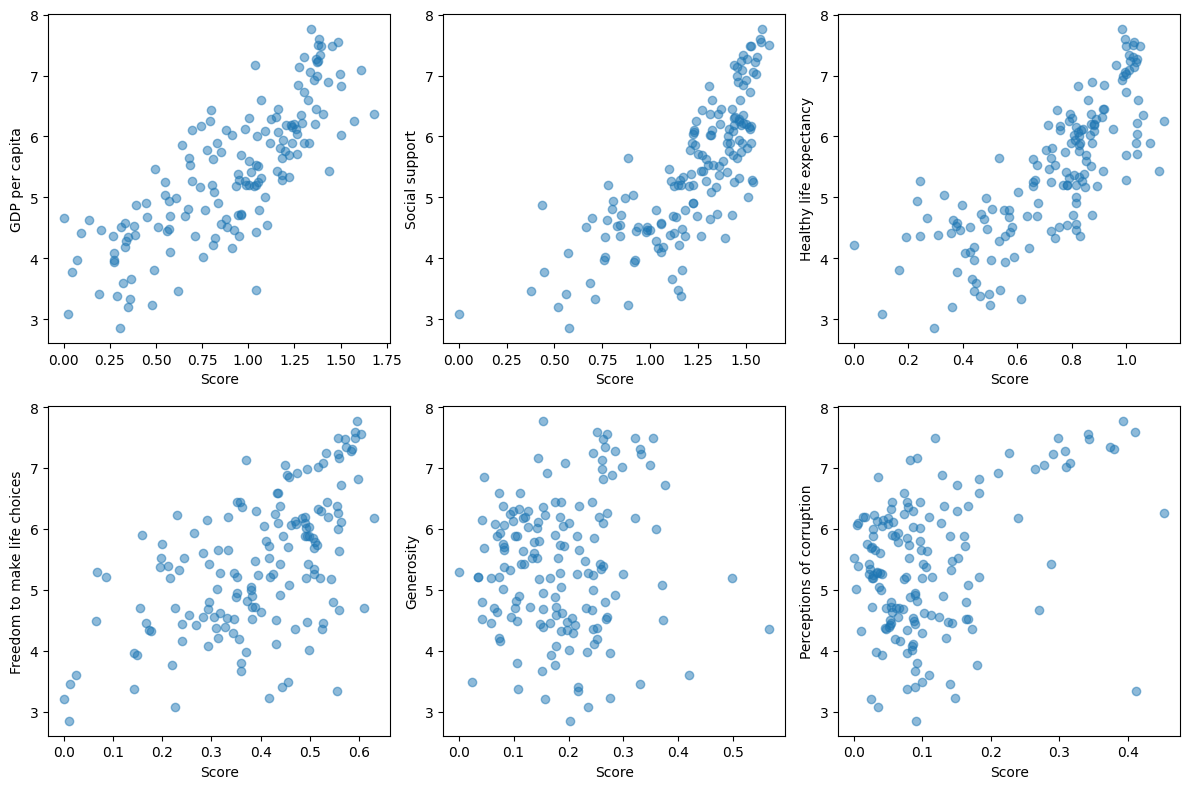

In [11]:
# Configurar la figura y los ejes de la matriz de subgráficas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Obtener los nombres de los factores
nombres = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Iterar sobre los factores y las subgráficas correspondientes
for i, factor in enumerate(nombres):
    # Obtener los datos del factor y el puntaje para todos los países
    factor_data = happiness[factor].values
    score_data = happiness['Score'].values

    # Calcular la posición de la subgráfica en la matriz de subgráficas
    fila = i // 3
    columna = i % 3

    # Crear el scatter plot del factor vs el puntaje en la subgráfica correspondiente
    axes[fila, columna].scatter(factor_data, score_data, alpha=0.5)
    axes[fila, columna].set_xlabel('Score')
    axes[fila, columna].set_ylabel(factor)

# Ajustar la disposición de las subgráficas y los espacios entre ellas
plt.tight_layout()

# Mostrar la matriz de subgráficas
plt.show()


\**9**.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

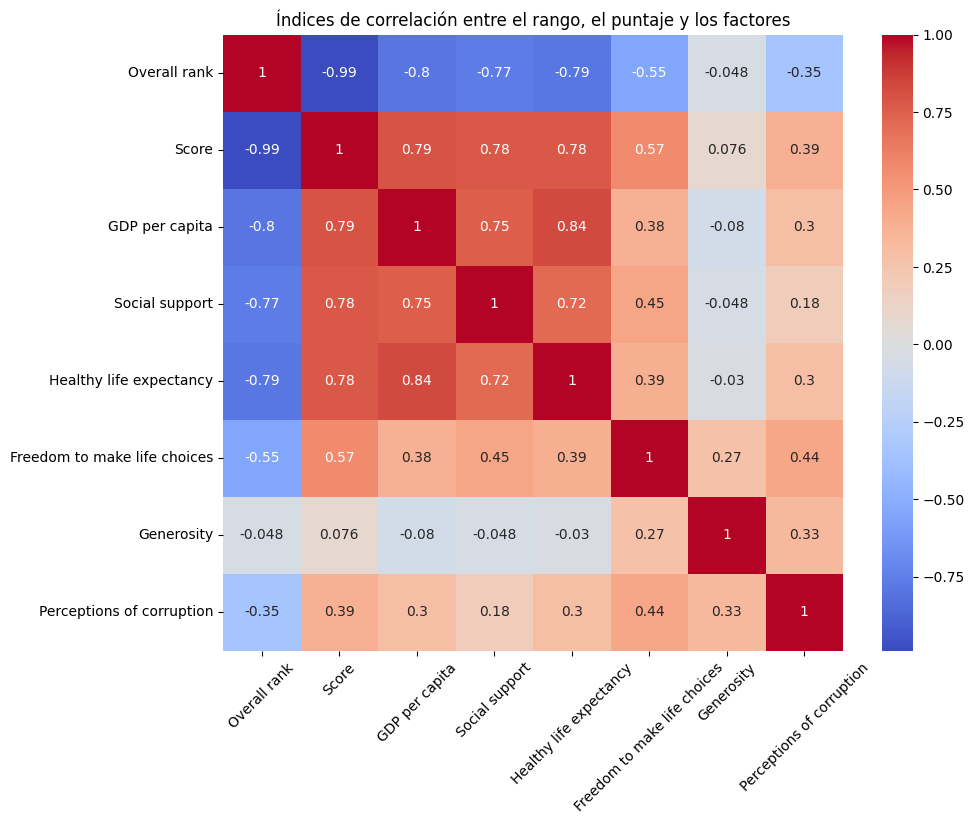

In [96]:
# Obtener los nombres de los factores
nombres = ['GDP per capita', 'Social support', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Obtener los datos para el rango general, puntaje y los factores
data = happiness[['Overall rank', 'Score'] + nombres]

# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Configurar la figura y los ejes del heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el heatmap con los índices de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

# Configurar los nombres de las etiquetas de los ejes x e y
ax.set_xticklabels(correlation_matrix.columns, rotation=45)
ax.set_yticklabels(correlation_matrix.columns, rotation=0)

# Configurar el título del heatmap
ax.set_title('Índices de correlación entre el rango, el puntaje y los factores')

# Mostrar el heatmap
plt.show()


10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

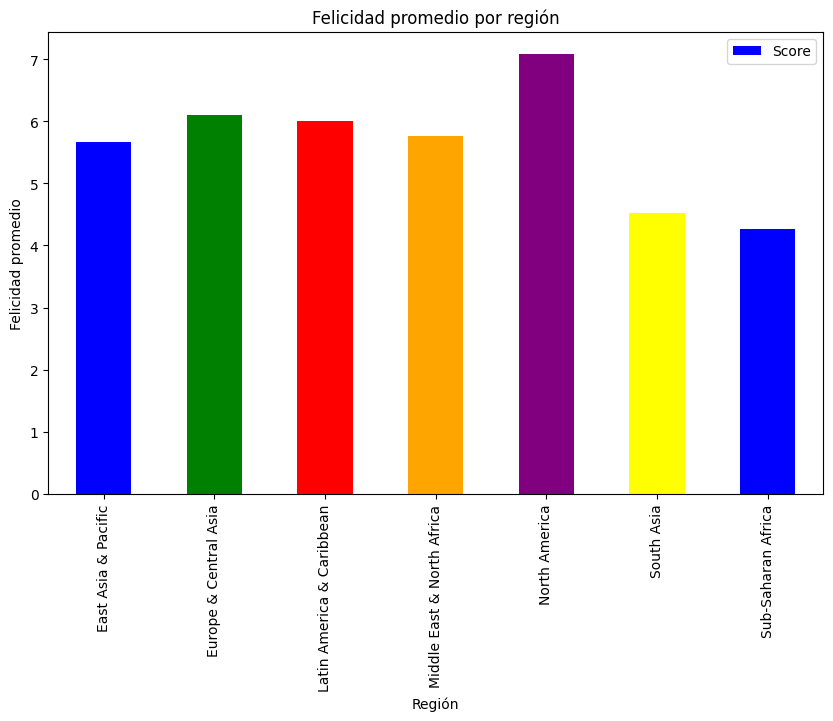

In [105]:
# Leer los dataframes de happiness y metadata
metadata = pd.read_csv('Metadata.csv')

# Fusionar los dataframes utilizando las columnas 'Country or region' y 'TableName'
merged_data = happiness.merge(metadata, left_on='Country or region', right_on='TableName')

# Calcular la felicidad promedio por región
region_happiness = merged_data.groupby('Region')['Score'].mean().reset_index()

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras para la felicidad promedio por región
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow']  # Lista de colores
region_happiness.plot(x='Region', y='Score', kind='bar', ax=ax, color=colors)

# Configurar los ejes y el título del gráfico
ax.set_xlabel('Región')
ax.set_ylabel('Score')
ax.set_title('World Happiness Report')

# Mostrar el gráfico
plt.show()
